In [625]:
import pandas as pd
import gurobipy as gp
import math
import pickle as pkl
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

In [626]:
product_type = "ambient"
num_time_periods = 7

article_data = pd.read_csv("./data/article.csv")
# article_data = article_data[(article_data['TEMPERATURE_ZONE'] == product_type)]

articles = article_data['ARTICLE_ID'].to_list()

forecast_data = pd.read_csv('./data/sales_'+str(num_time_periods)+'.csv')
# forecast_data = forecast_data[forecast_data['ARTICLE_ID'].isin(articles)]

In [627]:
df = article_data [article_data['MEAN_SHELF_LIFE'] <= 7 ]

In [628]:
df.count()

ARTICLE_ID                   1600
TEMPERATURE_ZONE             1600
CATEGORY_LEVEL_1             1600
CATEGORY_LEVEL_2             1600
VOLUME_M3_PER_CU             1600
MEAN_SHELF_LIFE              1600
CU_PER_TU                    1600
ORDERING_COST_FIXED          1600
ORDERING_COST_PER_TU         1600
SALES_MARGIN_PER_CU          1600
CLEARING_COST_PER_CU         1600
MINIMUM_ORDER_QUANTITY_TU    1600
MAXIMUM_ORDER_QUANTITY_TU       0
dtype: int64

In [629]:
article_data[article_data['MEAN_SHELF_LIFE'] == 1 ].count()

ARTICLE_ID                   13
TEMPERATURE_ZONE             13
CATEGORY_LEVEL_1             13
CATEGORY_LEVEL_2             13
VOLUME_M3_PER_CU             13
MEAN_SHELF_LIFE              13
CU_PER_TU                    13
ORDERING_COST_FIXED          13
ORDERING_COST_PER_TU         13
SALES_MARGIN_PER_CU          13
CLEARING_COST_PER_CU         13
MINIMUM_ORDER_QUANTITY_TU    13
MAXIMUM_ORDER_QUANTITY_TU     0
dtype: int64

In [630]:
df.count()

ARTICLE_ID                   1600
TEMPERATURE_ZONE             1600
CATEGORY_LEVEL_1             1600
CATEGORY_LEVEL_2             1600
VOLUME_M3_PER_CU             1600
MEAN_SHELF_LIFE              1600
CU_PER_TU                    1600
ORDERING_COST_FIXED          1600
ORDERING_COST_PER_TU         1600
SALES_MARGIN_PER_CU          1600
CLEARING_COST_PER_CU         1600
MINIMUM_ORDER_QUANTITY_TU    1600
MAXIMUM_ORDER_QUANTITY_TU       0
dtype: int64

In [631]:
articles_short = df['ARTICLE_ID'].to_list()
forecast_data_short = forecast_data[forecast_data['ARTICLE_ID'].isin(articles_short)]


In [632]:
v = forecast_data_short.groupby(['ARTICLE_ID', 'DATE']).agg(cum_sum = ('PICKING_QUANTITY_CU', 'sum'))
v = v.sort_values('cum_sum', ascending = False)

In [633]:
v.groupby(['DATE']).agg(cum_sum= ('cum_sum', 'sum'))


,cum_sum
DATE,
2022-07-11,50452
2022-07-12,39243
2022-07-13,35727
2022-07-14,47255
2022-07-15,48162
2022-07-16,21914


In [634]:
forecast_data.groupby(['DATE']).agg(cum_sum = ('PICKING_QUANTITY_CU', 'sum'))
#p = p.sort_values('cum_sum', ascending = False)

,cum_sum
DATE,
2022-07-11,141430
2022-07-12,110665
2022-07-13,103058
2022-07-14,127348
2022-07-15,130147
2022-07-16,60505


In [635]:
h = forecast_data.groupby(['ARTICLE_ID']).agg(cum_sum = ('PICKING_QUANTITY_CU', 'sum')).sort_values('cum_sum', ascending = False)


In [636]:
h[h['cum_sum'] < 10].count()

cum_sum    1087
dtype: int64

In [637]:
forecast_data['DATE'] = pd.to_datetime(forecast_data['DATE'])
forecast_data['DATE1'] = forecast_data['DATE']

forecast_data.set_index('DATE', inplace=True)

start_date = '2022-03-07'
end_date = '2022-03-13'

filtered_data = forecast_data.loc[start_date:end_date]
order_data_weekly = filtered_data.groupby([pd.Grouper(key='DATE1', freq='W-MON')])


# most_frequent_days = []
# most_frequent_item_per_week = []

# for week, week_data in order_data_weekly:
#     day_counts = week_data['DATE1'].dt.day_name().value_counts()
#     max_frequency = day_counts.max() 

#     item_counts = week_data['ARTICLE_ID'].value_counts()
#     most_frequent_items = item_counts[item_counts == item_counts.max()].index.tolist()  

#     most_frequent_item_per_week.append((week, most_frequent_items, max_frequency))
#     most_frequent_days.append((max_frequency))


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35880\904589357.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  filtered_data = forecast_data.loc[start_date:end_date]


In [638]:
order_data_weekly

In [639]:
weekly_counts = filtered_data.groupby(pd.Grouper(freq='W'))['ARTICLE_ID'].apply(lambda x: x.value_counts().loc[x.value_counts() == x.value_counts().max()].index.tolist())

# Print the most frequently ordered items for each week
print(weekly_counts)

Series([], Freq: W-SUN, Name: ARTICLE_ID, dtype: object)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35880\1699614009.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  weekly_counts = filtered_data.groupby(pd.Grouper(freq='W'))['ARTICLE_ID'].apply(lambda x: x.value_counts().loc[x.value_counts() == x.value_counts().max()].index.tolist())


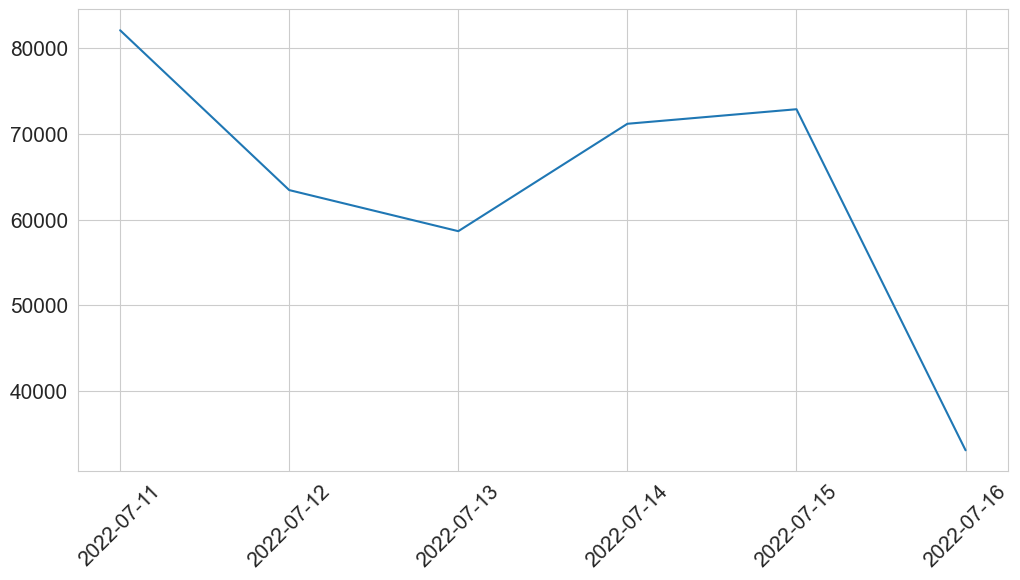

In [640]:
product_type = "ambient"
num_time_periods = 7

# Assuming your DataFrame is already loaded into 'df'
article_data = pd.read_csv("./data/article.csv")
article_data = article_data[(article_data['TEMPERATURE_ZONE'] == product_type)]
articles = article_data['ARTICLE_ID'].to_list()

forecast_data = pd.read_csv('./data/sales_'+str(num_time_periods)+'.csv')
forecast_data = forecast_data[forecast_data['ARTICLE_ID'].isin(articles)]

# Convert the 'date' column to a datetime data type
forecast_data['DATE'] = pd.to_datetime(forecast_data['DATE'])
#forecast_data['day_of_week'] = forecast_data['DATE'].dt.day_name()

forecast_data.set_index('DATE', inplace=True)

# start_date = '2022-02-01'
# end_date = '2022-06-01'

# filtered = forecast_data.loc[start_date:end_date]


daily_demand = forecast_data['PICKING_QUANTITY_CU'].resample('D').sum()

# # Plot the daily demand totals
fig, ax = plt.subplots(figsize=(12, 6))

#
ax.plot(daily_demand.index, daily_demand.values)
# ax.set(xlabel='Date', ylabel='Demand', title='Daily Demand Totals')

plt.xticks(rotation=45)
plt.show()




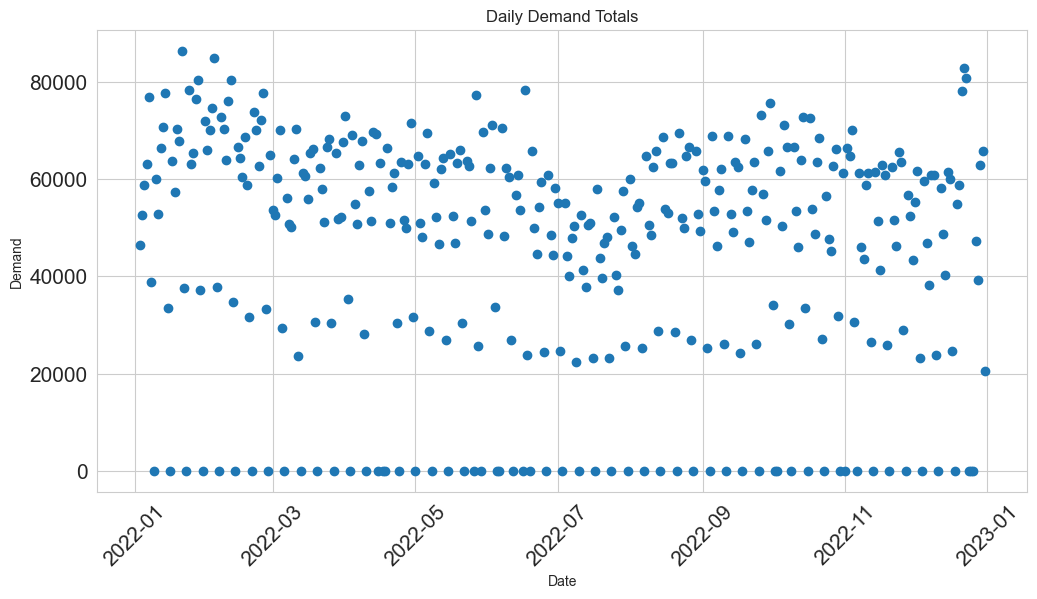

In [641]:
product_type = "chilled"
num_time_periods = 365

# Assuming your DataFrame is already loaded into 'df'
article_data = pd.read_csv("./data/article.csv")
article_data = article_data[(article_data['TEMPERATURE_ZONE'] == product_type)]
articles = article_data['ARTICLE_ID'].to_list()

forecast_data = pd.read_csv('./data/sales_'+str(num_time_periods)+'.csv')
forecast_data = forecast_data[forecast_data['ARTICLE_ID'].isin(articles)]

# Convert the 'date' column to a datetime data type
forecast_data['DATE'] = pd.to_datetime(forecast_data['DATE'])
#forecast_data['day_of_week'] = forecast_data['DATE'].dt.day_name()

forecast_data.set_index('DATE', inplace=True)

# start_date = '2022-11-03'
# end_date = '2022-12-27'

# filtered = forecast_data.loc[start_date:end_date]

daily_demand = forecast_data['PICKING_QUANTITY_CU'].resample('D').sum()

# # Plot the daily demand totals
fig, ax= plt.subplots(figsize=(12, 6))

#
ax.plot_date(daily_demand.index, daily_demand.values)
ax.set(xlabel='Date', ylabel='Demand', title='Daily Demand Totals')
#ax1.plot_date(daily_demand1.index,daily_demand1.values)
plt.xticks(rotation=45)
plt.show()


Monthly Demand and Weekly Demand Analysis

In [642]:
article_data = pd.read_csv("./data/article.csv")
forecast_data1 = pd.read_csv('./data/sales_365.csv')
 #Convert DATE column to datetime
forecast_data1['DATE'] = pd.to_datetime(forecast_data1['DATE'], format='%Y-%m-%d')

In [643]:

# Group by month and sum the picking quantity
forecast_data1['MONTH'] = forecast_data1['DATE'].dt.to_period('M')
monthly_demand = forecast_data1.groupby('MONTH')['PICKING_QUANTITY_CU'].sum().reset_index()

In [644]:
monthly_demand

,MONTH,PICKING_QUANTITY_CU
0,2022-01,3876837
1,2022-02,3879991
2,2022-03,3874870
3,2022-04,3393308
4,2022-05,3367299
5,2022-06,3198814
6,2022-07,2866596
7,2022-08,3642555
8,2022-09,3651490
9,2022-10,3479773


In [645]:

column_type = monthly_demand['MONTH'].dtypes
print("Column type:", column_type)


Column type: period[M]


In [646]:

monthly_demand['MONTH'] = monthly_demand['MONTH'].dt.to_timestamp()

monthly_demand['MONTH_NAME'] = monthly_demand['MONTH'].dt.strftime('%b')

monthly_demand

,MONTH,PICKING_QUANTITY_CU,MONTH_NAME
0,2022-01-01,3876837,Jan
1,2022-02-01,3879991,Feb
2,2022-03-01,3874870,Mar
3,2022-04-01,3393308,Apr
4,2022-05-01,3367299,May
5,2022-06-01,3198814,Jun
6,2022-07-01,2866596,Jul
7,2022-08-01,3642555,Aug
8,2022-09-01,3651490,Sep
9,2022-10-01,3479773,Oct


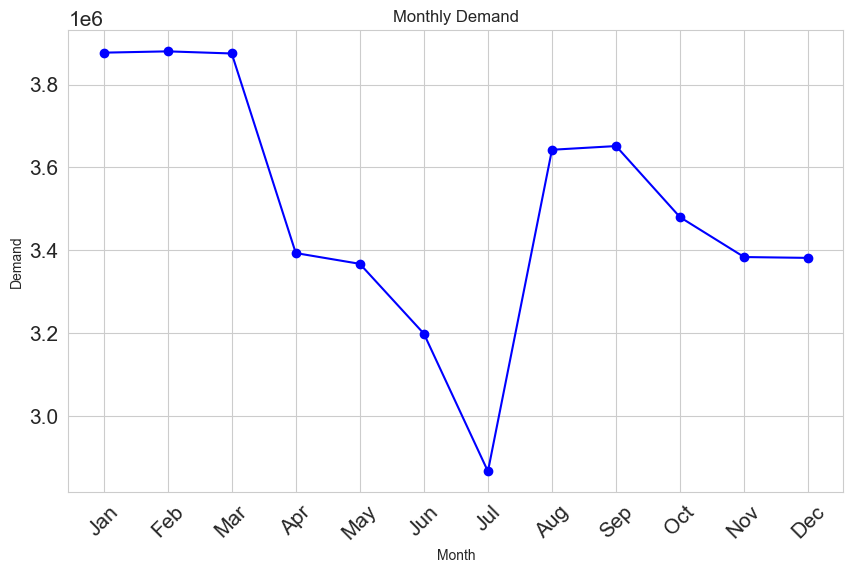

In [647]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand['MONTH_NAME'], monthly_demand['PICKING_QUANTITY_CU'], marker='o', linestyle='-', color='blue')

plt.title('Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Demand')
plt.xticks(rotation=45)

#Uncomment this incase if you want to show the datalabels (PS have to beautify it :P )
#for x, y, label in zip(monthly_demand['MONTH_NAME'], monthly_demand['PICKING_QUANTITY_CU'], monthly_demand['PICKING_QUANTITY_CU']):
   # plt.text(x, y, label, ha='center', va='bottom')

plt.show()

In [648]:
article_data = pd.read_csv("./data/article.csv")
forecast_data2 = pd.read_csv('./data/sales_365.csv')


In [649]:
# Group by month and sum the picking quantity
forecast_data2['WEEK'] = pd.to_datetime(forecast_data2['DATE']).dt.to_period('W')

In [650]:
weekly_demand = forecast_data2.groupby('WEEK')['PICKING_QUANTITY_CU'].sum().reset_index()


weekly_demand.head()

,WEEK,PICKING_QUANTITY_CU
0,2022-01-03/2022-01-09,828849
1,2022-01-10/2022-01-16,889685
2,2022-01-17/2022-01-23,956389
3,2022-01-24/2022-01-30,1009531
4,2022-01-31/2022-02-06,1045441


In [651]:
# Convert 'WEEK' column to strings
weekly_demand['WEEK'] = weekly_demand['WEEK'].astype(str)


# Extract the start date from 'WEEK' column
weekly_demand['WEEK'] = weekly_demand['WEEK'].str.split('/').str[0]

In [652]:
# Convert 'WEEK' column to timestamp
weekly_demand['WEEK'] = pd.to_datetime(weekly_demand['WEEK'], format='%Y-%m-%d')

# Add a new column 'WEEK_NUMBER' with week numbers
weekly_demand['WEEK_NUMBER'] = weekly_demand['WEEK'].dt.isocalendar().week

weekly_demand.head()


,WEEK,PICKING_QUANTITY_CU,WEEK_NUMBER
0,2022-01-03,828849,1
1,2022-01-10,889685,2
2,2022-01-17,956389,3
3,2022-01-24,1009531,4
4,2022-01-31,1045441,5


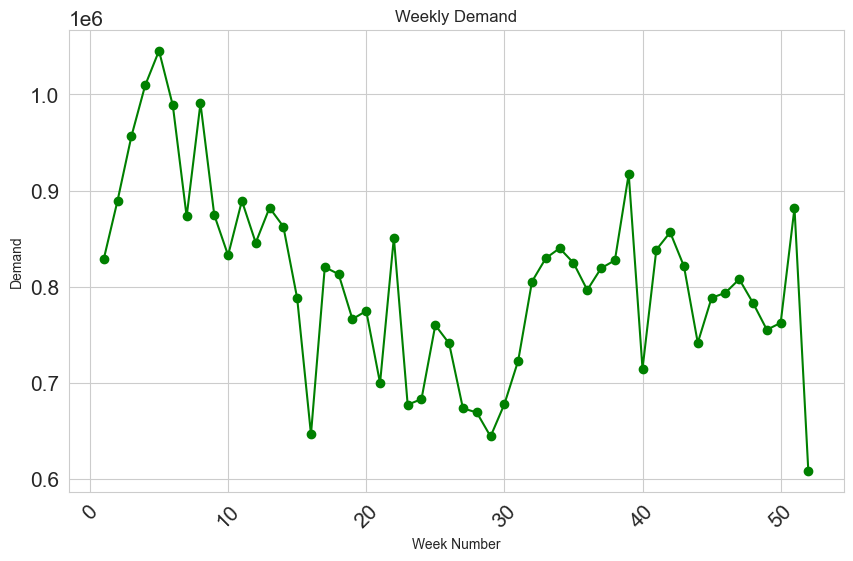

In [653]:

plt.figure(figsize=(10, 6))
plt.plot(weekly_demand['WEEK_NUMBER'], weekly_demand['PICKING_QUANTITY_CU'], marker='o', linestyle='-', color='green')

plt.title('Weekly Demand')
plt.xlabel('Week Number')
plt.ylabel('Demand')
plt.xticks(rotation=45)

#Uncomment this incase if you want to show the datalabels (PS have to beautify it :P )
#for x, y, label in zip(weekly_demand['WEEK_NUMBER'], weekly_demand['PICKING_QUANTITY_CU'], weekly_demand['PICKING_QUANTITY_CU']):
   # plt.text(x, y, label, ha='center', va='bottom')

plt.show()

Top 5 frequently ordered items by category

In [654]:
p_type = "ambient"
num_time_periods = 365
article_data = pd.read_csv("./data/article.csv")
forecast_data = pd.read_csv('./data/sales_365.csv')
def createParameterMatrix(data, columns):
    parameters = []
    for column in columns:
        parameters.append(data[column].to_list())
    parameters = list(map(list, zip(*parameters)))
    return parameters

def top_5_finder(product_type):
    articles_data = article_data[(article_data['TEMPERATURE_ZONE'] == product_type)]
    articles = articles_data['ARTICLE_ID'].to_list()

    parameters = createParameterMatrix(
        articles_data,
        [
            'TEMPERATURE_ZONE',
            'VOLUME_M3_PER_CU',
            'MEAN_SHELF_LIFE',
            'CU_PER_TU',
            'ORDERING_COST_FIXED',
            'ORDERING_COST_PER_TU',
            'CLEARING_COST_PER_CU',
            'MINIMUM_ORDER_QUANTITY_TU',
            'MAXIMUM_ORDER_QUANTITY_TU'
        ]
    )
    parameters_dict = dict(zip(articles, parameters))
    
    forecasts_data = forecast_data[forecast_data['ARTICLE_ID'].isin(articles)]
    forecasts_data['DATE'] = pd.to_datetime(forecasts_data['DATE'], format='%Y-%m-%d')
    grouped = forecasts_data.groupby('ARTICLE_ID')['PICKING_QUANTITY_CU'].sum()
    sorted_groups = grouped.sort_values(ascending=False)
    top_5_items = sorted_groups.head(5)
    print(top_5_items)
    return top_5_items

In [655]:
top_5_items = top_5_finder(p_type)

ARTICLE_ID
a47e6a77    450742
5bf678a8    399808
8efa9c94    311837
6a201fbd    249191
d929afb9    203747
Name: PICKING_QUANTITY_CU, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35880\3997034149.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts_data['DATE'] = pd.to_datetime(forecasts_data['DATE'], format='%Y-%m-%d')


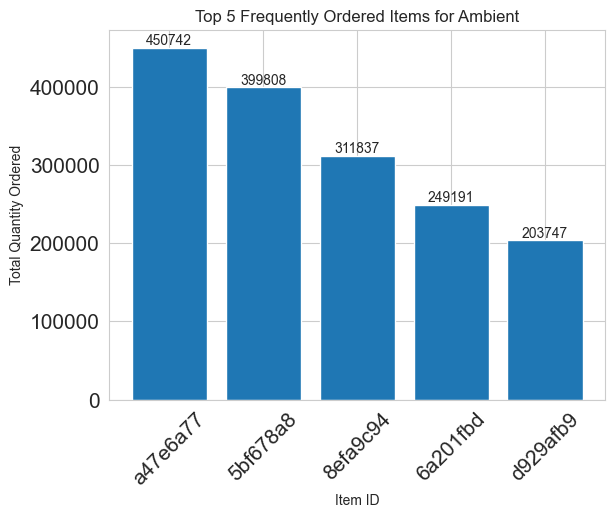

In [656]:
plt.bar(top_5_items.index, top_5_items.values)

plt.title('Top 5 Frequently Ordered Items for Ambient')
plt.xlabel('Item ID')
plt.ylabel('Total Quantity Ordered')

for i, value in enumerate(top_5_items.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

In [657]:
#### Most frequently ordered Chilled items

p_type = "chilled"
top_5_items = top_5_finder(p_type)

ARTICLE_ID
8a75fa14    205692
6a116468    204961
caebe70e    177125
eeff6848    147577
5faafeef    142839
Name: PICKING_QUANTITY_CU, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35880\3997034149.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts_data['DATE'] = pd.to_datetime(forecasts_data['DATE'], format='%Y-%m-%d')


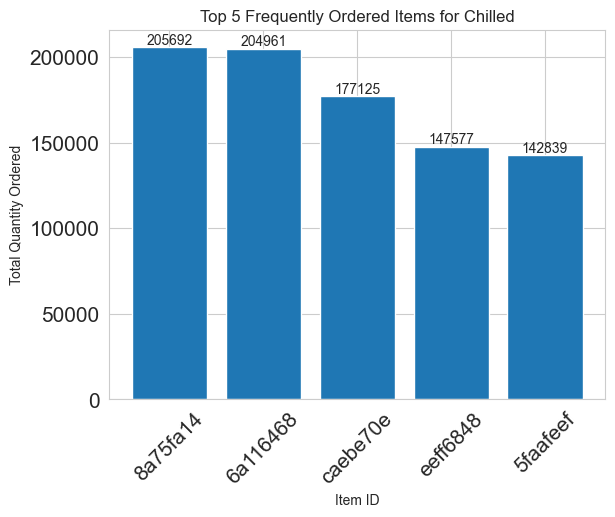

In [658]:
plt.bar(top_5_items.index, top_5_items.values)

plt.title('Top 5 Frequently Ordered Items for Chilled')
plt.xlabel('Item ID')
plt.ylabel('Total Quantity Ordered')

for i, value in enumerate(top_5_items.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

In [659]:
p_type = "frozen"
top_5_items = top_5_finder(p_type)

ARTICLE_ID
c1bea219    33836
1d34848b    32146
b1722e6e    30885
499d4776    29724
e4dbe3a3    26516
Name: PICKING_QUANTITY_CU, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_35880\3997034149.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecasts_data['DATE'] = pd.to_datetime(forecasts_data['DATE'], format='%Y-%m-%d')


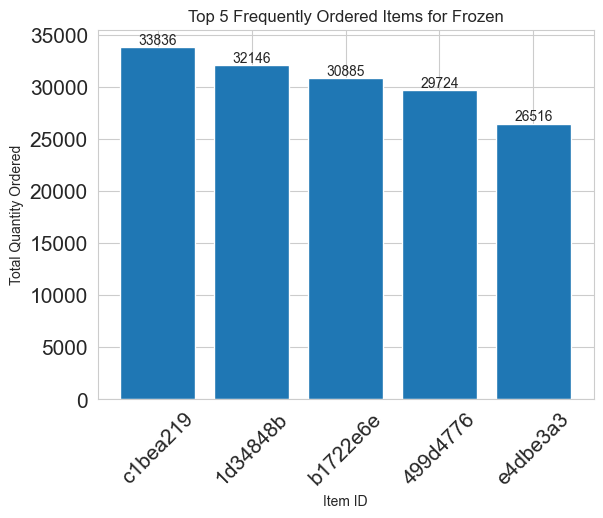

In [660]:
plt.bar(top_5_items.index, top_5_items.values)

plt.title('Top 5 Frequently Ordered Items for Frozen')
plt.xlabel('Item ID')
plt.ylabel('Total Quantity Ordered')

for i, value in enumerate(top_5_items.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.show()

In [661]:
merged_table = pd.merge(article_data, forecast_data, on='ARTICLE_ID')

In [662]:
grouped_data = merged_table.groupby(['TEMPERATURE_ZONE', 'CATEGORY_LEVEL_2']).agg({'PICKING_QUANTITY_CU': 'sum'})

In [663]:
sorted_data = grouped_data.sort_values(['TEMPERATURE_ZONE', 'PICKING_QUANTITY_CU'], ascending=[True, False])

<Figure size 640x480 with 0 Axes>

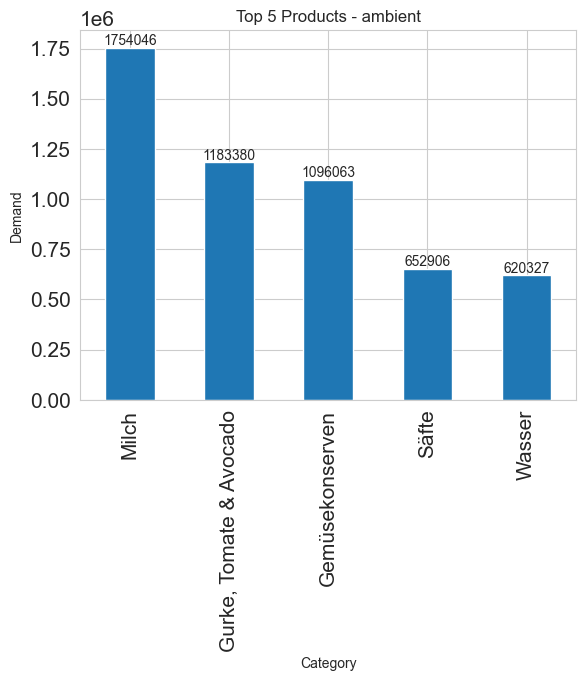

<Figure size 640x480 with 0 Axes>

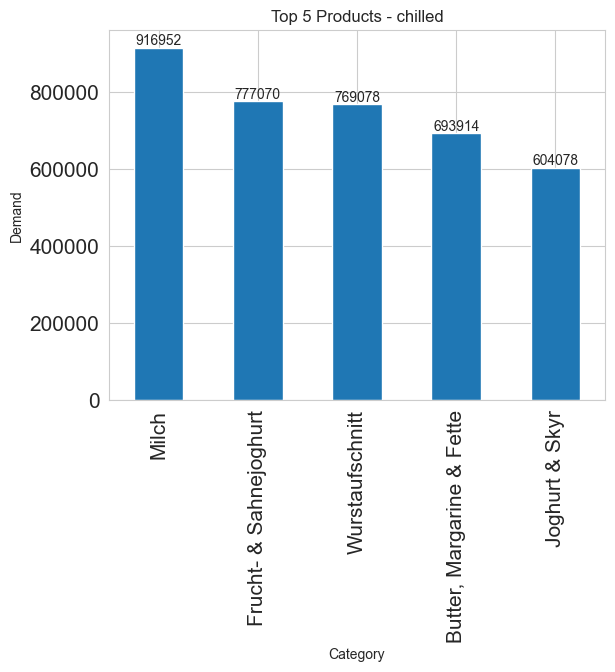

<Figure size 640x480 with 0 Axes>

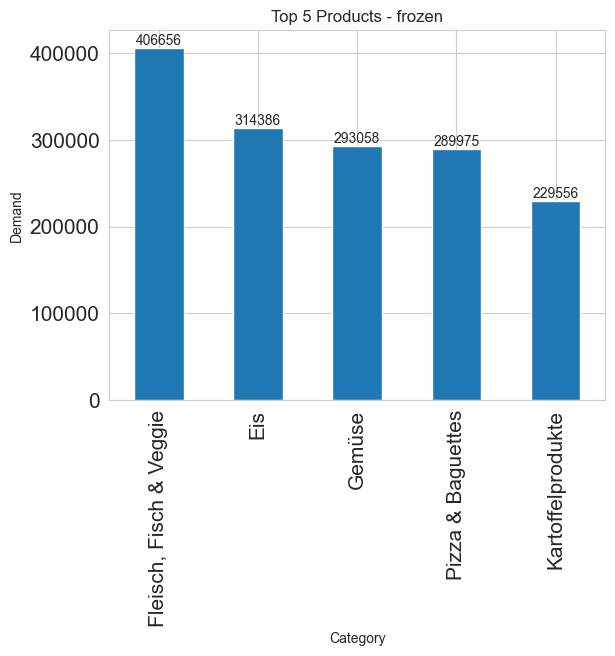

In [664]:
# Iterate over the temperature zones
temperature_zones = sorted_data.index.get_level_values('TEMPERATURE_ZONE').unique()
for zone in temperature_zones:
    # Get the top 5 products for the current temperature zone
    top_5_products = sorted_data.loc[zone].nlargest(5, 'PICKING_QUANTITY_CU')

    # Plot the graph
    plt.figure()
    ax = top_5_products.plot(kind='bar', legend=False)
    plt.xlabel('Category')
    plt.ylabel('Demand')
    plt.title(f'Top 5 Products - {zone}')

    # Add data labels to the bar plot
    for i, v in enumerate(top_5_products['PICKING_QUANTITY_CU']):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.show()

Top 5 items with most storage used

In [665]:
# 1) Top 5 items which occupy the most storage
top5_items = article_data.nlargest(5, 'VOLUME_M3_PER_CU')
top5_demand = forecast_data.nlargest(5,'PICKING_QUANTITY_CU')
print("Top 5 items which occupy the most storage:")
print(top5_items)
print(top5_demand)

Top 5 items which occupy the most storage:
     ARTICLE_ID TEMPERATURE_ZONE         CATEGORY_LEVEL_1 CATEGORY_LEVEL_2  \
2027   05056450          chilled  Fleisch, Fisch & Veggie          Schwein   
4070   1aa8bf56          ambient                 Haushalt  Papier & Tücher   
54     b41de480          ambient              Baby & Kind          Wickeln   
3494   b1a888dc          ambient              Baby & Kind          Wickeln   
91     c35bdd92           frozen                 Tiefkühl           Gemüse   

      VOLUME_M3_PER_CU  MEAN_SHELF_LIFE  CU_PER_TU  ORDERING_COST_FIXED  \
2027          0.030000                3          2                  5.6   
4070          0.027588             1000          6                  9.9   
54            0.024823             1000         13                 18.0   
3494          0.024415             1000         14                 19.1   
91            0.024000             1000         15                 19.9   

      ORDERING_COST_PER_TU  SALES_MAR

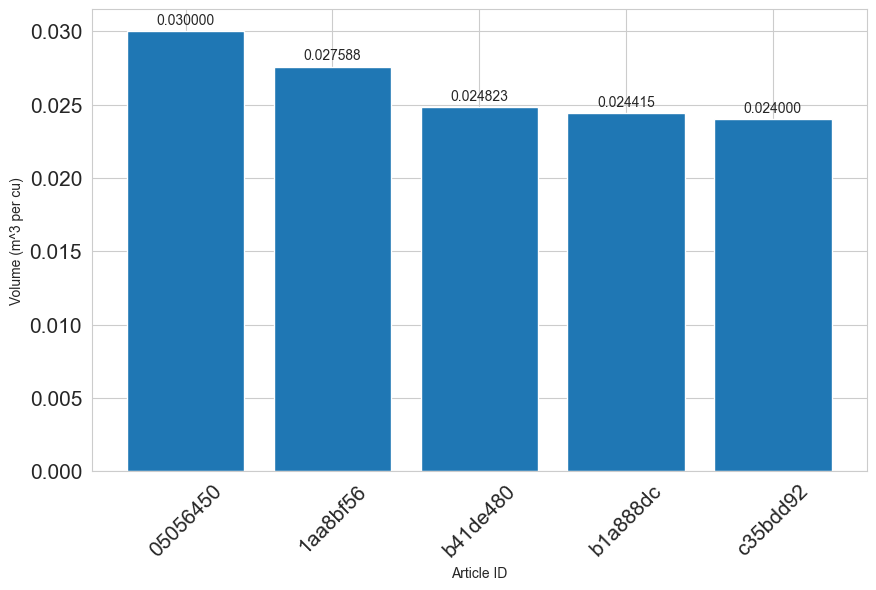

In [666]:

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_items['ARTICLE_ID'], top5_items['VOLUME_M3_PER_CU'])
plt.xlabel('Article ID')
plt.ylabel('Volume (m^3 per cu)')
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.6f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')


plt.show()

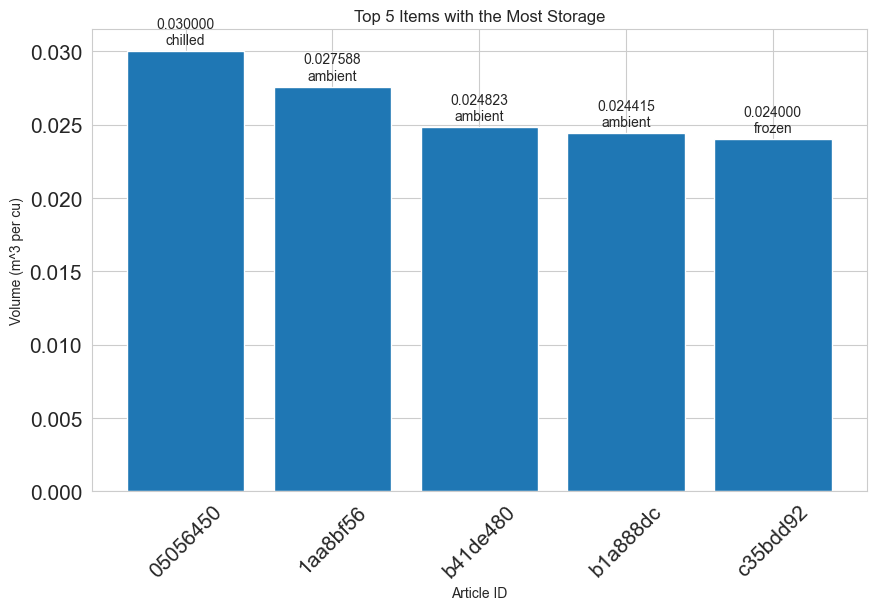

In [667]:

plt.figure(figsize=(10, 6))
bars = plt.bar(top5_items['ARTICLE_ID'], top5_items['VOLUME_M3_PER_CU'])
plt.title('Top 5 Items with the Most Storage')
plt.xlabel('Article ID')
plt.ylabel('Volume (m^3 per cu)')
plt.xticks(rotation=45)

# Adding data labels with temperature zone
for bar, temp_zone in zip(bars, top5_items['TEMPERATURE_ZONE']):
    height = bar.get_height()
    plt.annotate(f'{height:.6f}\n{temp_zone}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')

plt.show()


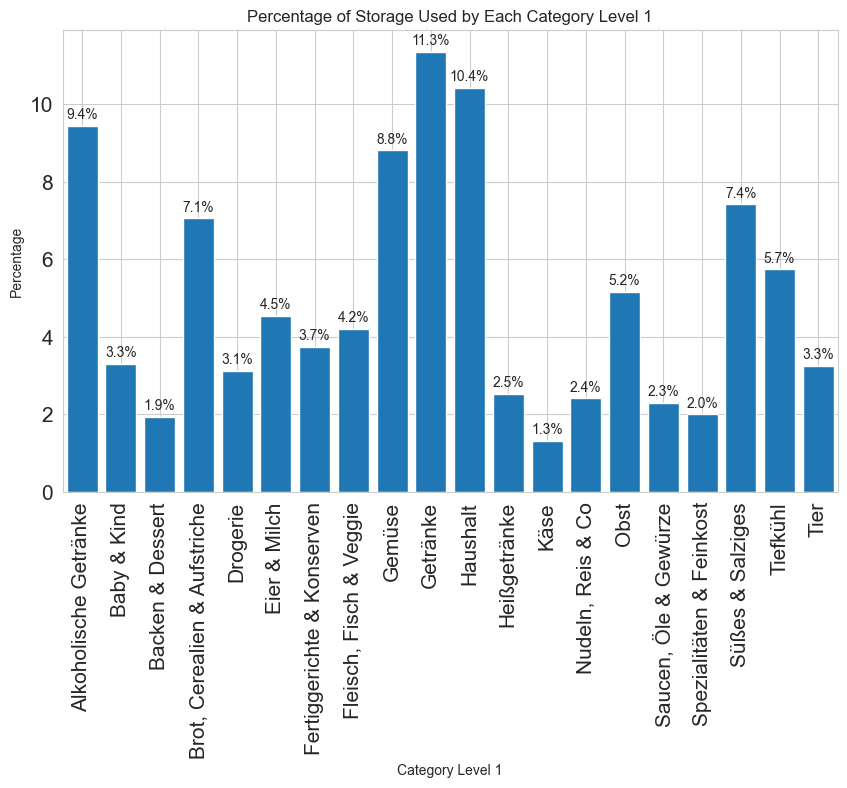

In [668]:
# 2) Percentage of storage used by each category level 1 column
category_percentage = article_data.groupby('CATEGORY_LEVEL_1')['VOLUME_M3_PER_CU'].sum() / article_data['VOLUME_M3_PER_CU'].sum() * 100
category_percentage.plot(kind='bar', figsize=(10, 6))
plt.title('Percentage of Storage Used by Each Category Level 1')
plt.xlabel('Category Level 1')
plt.ylabel('Percentage')

bars = plt.bar(category_percentage.index, category_percentage.values )
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.1f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom')
    
plt.show()

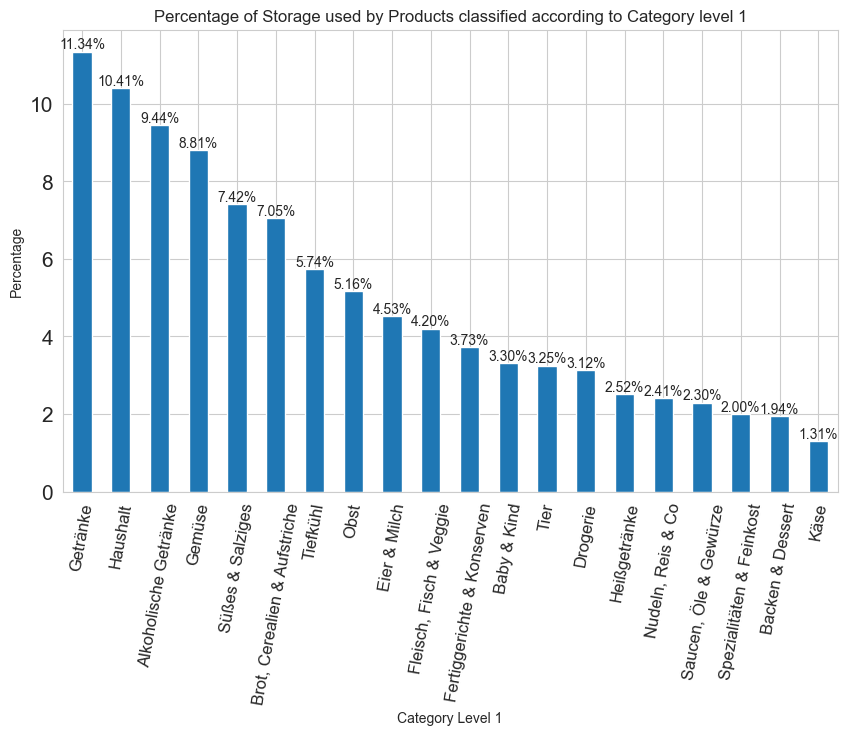

In [669]:
import matplotlib.pyplot as plt

category_percentage = article_data.groupby('CATEGORY_LEVEL_1')['VOLUME_M3_PER_CU'].sum() / article_data['VOLUME_M3_PER_CU'].sum() * 100
category_percentage_sorted = category_percentage.sort_values(ascending=False)

# Plotting the bar chart
ax = category_percentage_sorted.plot(kind='bar', figsize=(10, 6))

# Adding the percentage values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Formatting the plot
plt.title('Percentage of Storage used by Products classified according to Category level 1')
plt.xlabel('Category Level 1')
plt.ylabel('Percentage')
plt.xticks(rotation=80,fontsize=12)

# Displaying the plot
plt.show()

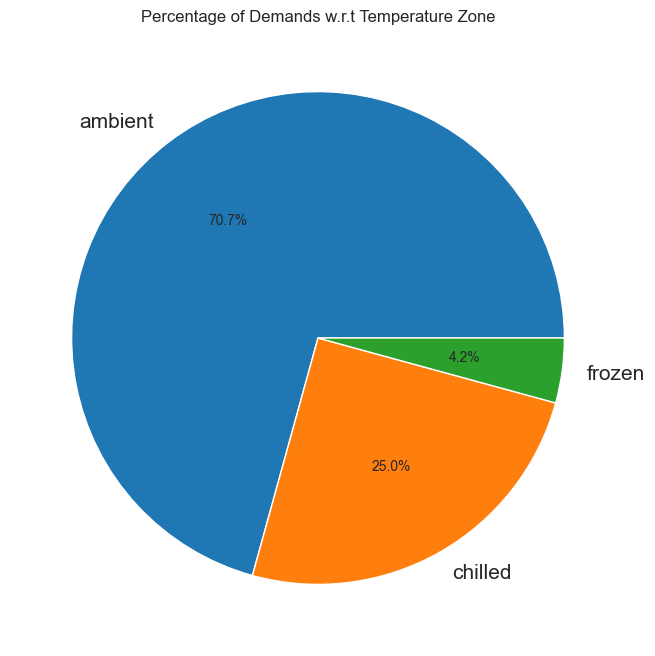

In [670]:
# 3) Percentage of storage used by items in each temperature zone
zone_percentage = forecast_data['PICKING_QUANTITY_CU'].groupby(article_data['TEMPERATURE_ZONE']).sum() / forecast_data['PICKING_QUANTITY_CU'].sum() * 100
zone_percentage.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Demands w.r.t Temperature Zone')
plt.ylabel('')  # Remove the label for the y-axis
plt.show()

Top 50% Demand Produciing items

In [671]:
def createParameterMatrix(data, columns):
    parameters = []
    for column in columns:
        parameters.append(data[column].to_list())
    parameters = list(map(list, zip(*parameters)))
    return parameters

articles = article_data['ARTICLE_ID'].to_list()

parameters = createParameterMatrix(
    article_data,
    [
        'TEMPERATURE_ZONE',
        'VOLUME_M3_PER_CU',
        'MEAN_SHELF_LIFE',
        'CU_PER_TU',
        'ORDERING_COST_FIXED',
        'ORDERING_COST_PER_TU',
        'CLEARING_COST_PER_CU',
        'MINIMUM_ORDER_QUANTITY_TU',
        'MAXIMUM_ORDER_QUANTITY_TU'
    ]
)
parameters_dict = dict(zip(articles, parameters))

In [672]:
items, category, volume_per_cu, shelf_life, cu_per_tu, ordering_cost_fixed, ordering_cost_per_tu, clearing_cost_per_cu, minimum_order_quantity_tu, maximum_order_quantity_tu = gp.multidict(parameters_dict)

In [673]:
forecast_data3 = pd.read_csv('./data/sales_365.csv')
forecast_data3 = forecast_data3[forecast_data3['ARTICLE_ID'].isin(articles)]

In [674]:
forecast_data.head(5)

,ARTICLE_ID,DATE,PICKING_QUANTITY_CU
0,e2b52cb2,2022-05-25,1
1,e2b52cb2,2022-05-30,2
2,e2b52cb2,2022-05-31,1
3,e2b52cb2,2022-06-01,2
4,e2b52cb2,2022-06-07,1


In [675]:
forecast_data['DATE'] = pd.to_datetime(forecast_data['DATE'], format='%Y-%m-%d')

In [676]:
forecast_data['TOTAL_DEMAND'] = forecast_data.groupby('ARTICLE_ID')['PICKING_QUANTITY_CU'].transform('sum')

In [677]:
forecast_data = forecast_data.sort_values('TOTAL_DEMAND', ascending=False)

In [678]:
forecast_data['CUMULATIVE_PERCENTAGE'] = forecast_data['TOTAL_DEMAND'].cumsum() / forecast_data['TOTAL_DEMAND'].sum()
top_items = forecast_data[forecast_data['CUMULATIVE_PERCENTAGE'] <= 0.5]['ARTICLE_ID'].unique()

In [679]:
top_df = forecast_data[forecast_data['ARTICLE_ID'].isin(top_items)]

In [680]:
monthly_demand = top_df.groupby(pd.Grouper(key='DATE', freq='M'))['PICKING_QUANTITY_CU'].sum()

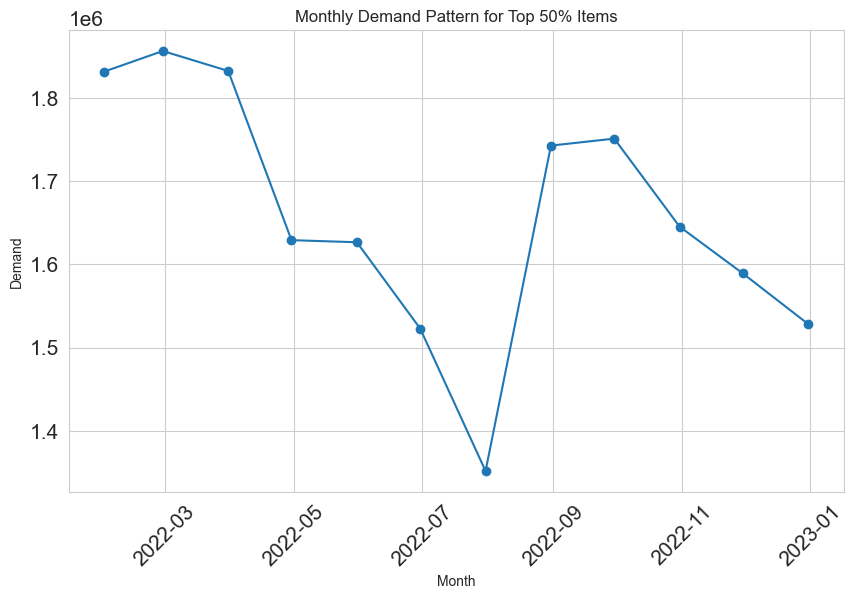

In [681]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_demand.index, monthly_demand.values, marker='o')

#for x, y in zip(monthly_demand.index, monthly_demand.values):
    #plt.text(x, y, str(y), ha='center', va='bottom')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Monthly Demand Pattern for Top 50% Items')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()